# Muhammad Fazal Hildiansyah - DS2

## Import Library

In [1]:
# Install connector first
# !pip install psycopg2

     |████████████████████████████████| 383 kB 3.4 MB/s eta 0:00:01
  Created wheel for psycopg2: filename=psycopg2-2.8.6-cp38-cp38-linux_x86_64.whl size=501297 sha256=eb5c0d0c21ff054309b9e53773d7c8984e5f6aa1fe2ff99de0b7994481272ddd
  Stored in directory: /root/.cache/pip/wheels/70/5e/69/8a020d78c09043156a7df0b64529e460fbd922ca065c4b795c
Successfully built psycopg2


In [3]:
import pandas as pd
from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt

## Data Extracting

In [4]:
# Connection credentials
settings = {
   'user': 'postgres',
   'pass': 'xxxxxx',
   'host': '34.xxx.xxx.xxx', # you can get IP in SQL Instance Dashboard
     'db': 'one-db' # your database
}
url = 'postgresql+psycopg2://{user}:{pass}@{host}:5432/{db}'.format(**settings) # 5432 is default port
engine = create_engine(url, client_encoding='utf8')

In [5]:
# Check all table in database
query = """
    SELECT * FROM information_schema.tables WHERE table_schema='public'
"""

df = pd.read_sql(query, con=engine)

df['table_name']

0                     actor_info
1                  customer_list
2                      film_list
3     nicer_but_slower_film_list
4         sales_by_film_category
5                 sales_by_store
6                     staff_list
7                           film
8                          actor
9                        address
10                      category
11                          city
12                       country
13                      customer
14                    film_actor
15                 film_category
16                     inventory
17                      language
18                        rental
19                         staff
20                         store
21                       payment
Name: table_name, dtype: object

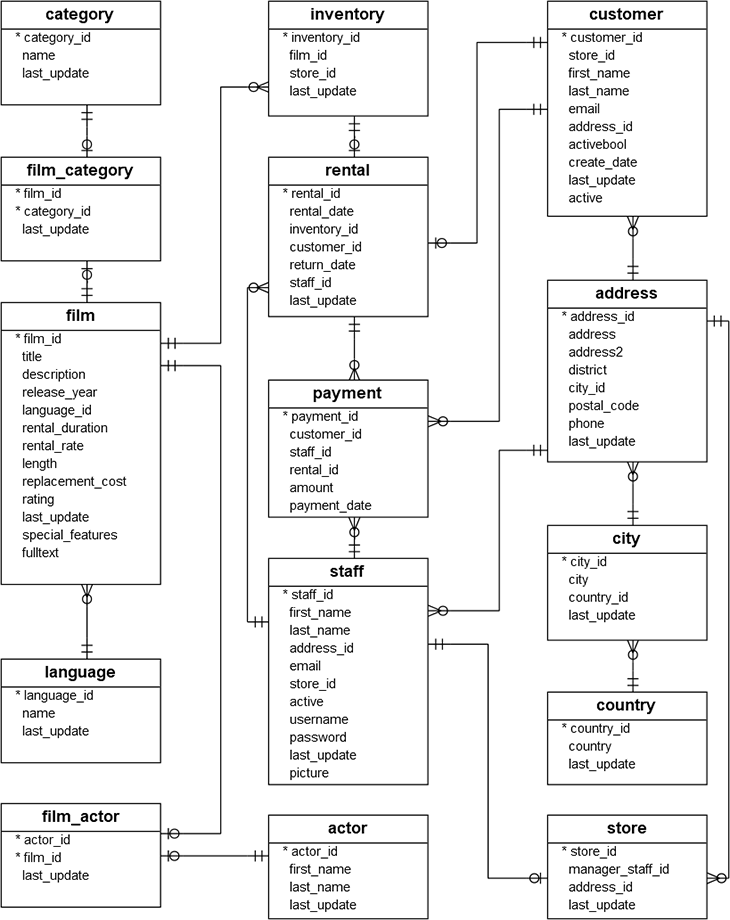

In [6]:
# Check ERD those tables
from IPython import display
display.Image("https://sp.postgresqltutorial.com/wp-content/uploads/2018/03/dvd-rental-sample-database-diagram.png")

## Question

Using GCP, Upload DVD Rental Data to GCS/BigQuery (using Google DataProc) and use the jupyter notebook (python3/pyspark) to make min. 4 data visualizations from the data using python dataviz library (youre free to use seaborn, matplotlib, bokeh, and etc).<br/>And because there is no question about the analysis, so i'll try to make 4 questions for it.

### 1. How is the comparison replacement cost by film rating ?
We will know which rating that most expensive

In [7]:
# Extract data for number 1
query = """
    SELECT * FROM film
"""

df_satu = pd.read_sql(query, con=engine)

df_satu.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [8]:
df_satu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   object        
 2   description       1000 non-null   object        
 3   release_year      1000 non-null   int64         
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   float64       
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   float64       
 9   rating            1000 non-null   object        
 10  last_update       1000 non-null   datetime64[ns]
 11  special_features  1000 non-null   object        
 12  fulltext          1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 101.7+ KB


In [9]:
df_s = df_satu.groupby('rating')['replacement_cost'].mean()

df_s

rating
G        20.124831
NC-17    20.137619
PG       18.959072
PG-13    20.402556
R        20.231026
Name: replacement_cost, dtype: float64

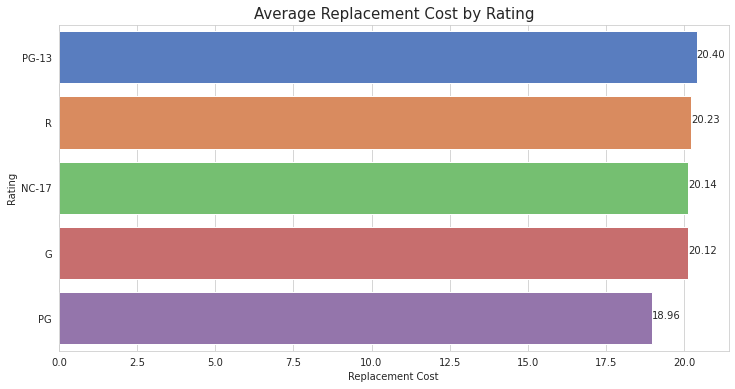

In [10]:
df_s = df_s.sort_values(ascending=False)

#ax = sns.barplot(y=df_s.index, x=df_s).set_title('Average Replacement Cost by Rating')

#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=df_s, y=df_s.index, ci=None, palette="muted",orient='h' )
ax.set_title("Average Replacement Cost by Rating", fontsize=15)
ax.set_xlabel ("Replacement Cost")
ax.set_ylabel ("Rating")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width() )

### 2. How is the composition staff by payment that they handled ?
We will know staff that handled most payment

In [11]:
# Extract data for number 2
query = """
    SELECT 
        p.staff_id
        ,concat(s.first_name,' ',s.last_name) as staff_name
        ,sum(p.amount) as amount_payment_handled
    FROM
        payment p
    LEFT JOIN
        staff s
    ON p.staff_id = s.staff_id
    GROUP BY p.staff_id, s.first_name, s.last_name
"""

df_dua = pd.read_sql(query, con=engine)

df_dua.head()

,staff_id,staff_name,amount_payment_handled
0,2,Jon Stephens,31059.92
1,1,Mike Hillyer,30252.12


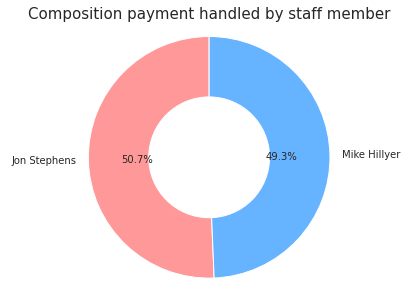

In [12]:
# Create Composition Donut Chart for the visualization

# create pie
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(df_dua['amount_payment_handled'], colors = colors, labels=df_dua['staff_name'], autopct='%1.1f%%', startangle=90)
#draw circle with white in middle of it, so we called it pie
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Composition payment handled by staff member', fontsize=15)
plt.show()

### 3. How is the distribution payment amount in this dataset ?
We will know distribution of payment amount

In [13]:
# Extract data for number 3
query = """
    SELECT * FROM payment
"""

df_tiga = pd.read_sql(query, con=engine)

df_tiga.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577


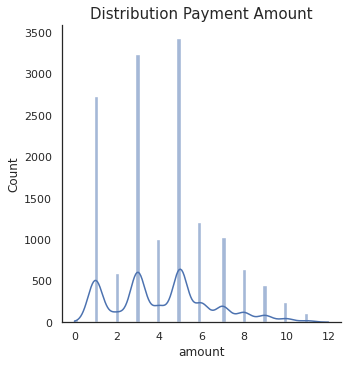

In [14]:
# Create distribution plot
sns.set_theme(style="white")
sns.displot(data=df_tiga, x=df_tiga['amount'], kde=True)
plt.title("Distribution Payment Amount", fontsize=15)
plt.show()

In [18]:
df_tiga['amount'].describe()

count    14596.000000
mean         4.200606
std          2.368946
min          0.000000
25%          2.990000
50%          3.990000
75%          4.990000
max         11.990000
Name: amount, dtype: float64

### 4. Is there any relationship for Total rented user and Average rental amount ?

In [19]:
# Extract data for number 4
query = """
    SELECT
        s.title
        ,s.genre
        ,count(distinct c.customer_id) as total_rented_user
        ,avg(p.amount) as average_rental_amount
    FROM rental r 
    LEFT JOIN customer c ON r.customer_id = c.customer_id 
    LEFT JOIN inventory i ON r.inventory_id = i.inventory_id 
    LEFT JOIN 
        (SELECT f.film_id, f.title , cat.name as genre
        FROM film f
        LEFT JOIN film_category fc ON f.film_id = fc.film_id
        LEFT JOIN category cat ON fc.category_id = cat.category_id) s
            ON i.film_id = s.film_id
    LEFT JOIN payment p ON r.rental_id = p.rental_id 
    GROUP BY s.title, s.genre
"""

df_empat = pd.read_sql(query, con=engine)

df_empat.head()

,title,genre,total_rented_user,average_rental_amount
0,Academy Dinosaur,Documentary,23,1.609048
1,Ace Goldfinger,Horror,7,7.561429
2,Adaptation Holes,Documentary,12,3.171818
3,Affair Prejudice,Horror,22,3.990000
4,African Egg,Family,12,4.353636


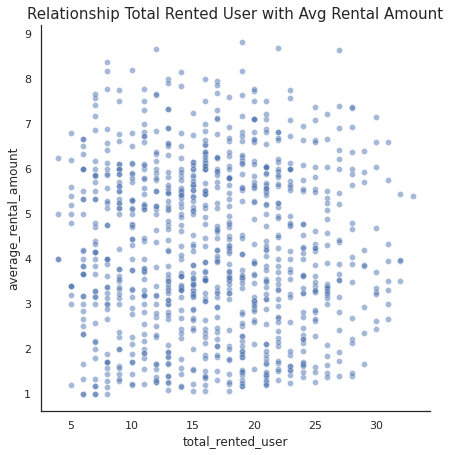

In [20]:
sns.set_theme(style='white')
sns.relplot(x=df_empat['total_rented_user'], y=df_empat['average_rental_amount'],
            sizes=(40, 400), alpha=.5, palette='muted',
            height=6, data=df_empat)
plt.title("Relationship Total Rented User with Avg Rental Amount", fontsize=15)
plt.show()

As we can see there is no relationship between them. Let us check how if we group by genre?

In [26]:
# Group it by genre
df_e = df_empat.groupby('genre').agg({'total_rented_user' : 'sum', 'average_rental_amount' : 'mean'})

df_e

,total_rented_user,average_rental_amount
genre,,
Action,1090,3.992027
Animation,1151,4.064192
Children,939,3.955800
Classics,923,3.966105
Comedy,927,4.556673
Documentary,1033,3.966211
Drama,1050,4.152654
Family,1088,3.907822
Foreign,1013,4.188016


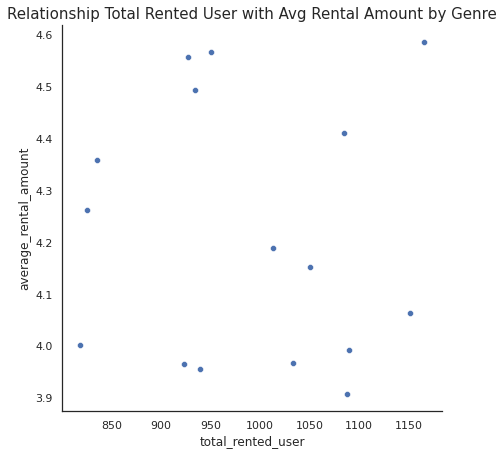

In [25]:
sns.set_theme(style='white')
sns.relplot(x=df_e['total_rented_user'], y=df_e['average_rental_amount'],
            sizes=(40, 400), palette='muted',
            height=6, data=df_e)
plt.title("Relationship Total Rented User with Avg Rental Amount by Genre", fontsize=15)
plt.show()

And for now, we have conlusion that there is no relationship between them.
But let me show you which genre will be maximum revenue comes from.

In [37]:
df_e['revenue'] = df_e['total_rented_user'] * df_e['average_rental_amount']

df_e = df_e.sort_values(by='revenue', ascending=False)

df_e

,total_rented_user,average_rental_amount,revenue
genre,,,
Sports,1166,4.585523,5346.720000
Sci-Fi,1085,4.411250,4786.206448
Animation,1151,4.064192,4677.885359
Drama,1050,4.152654,4360.286786
Action,1090,3.992027,4351.309603
Games,951,4.566809,4343.035773
Family,1088,3.907822,4251.710360
Foreign,1013,4.188016,4242.460178
Comedy,927,4.556673,4224.036109


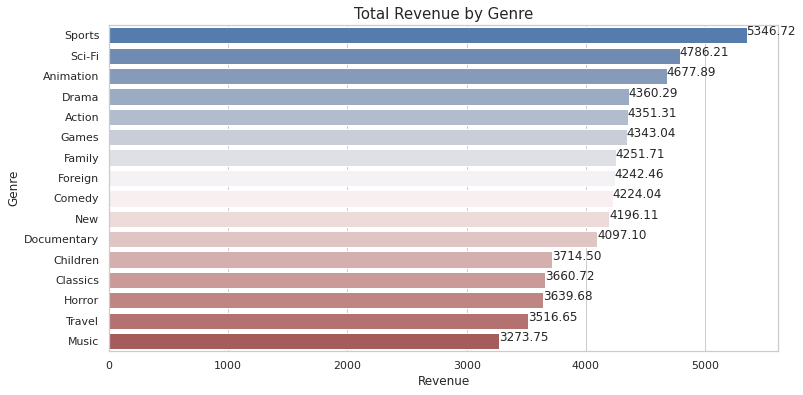

In [40]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=df_e['revenue'], y=df_e.index, palette='vlag', ci=None,orient='h' )
ax.set_title("Total Revenue by Genre", fontsize=15)
ax.set_xlabel ("Revenue")
ax.set_ylabel ("Genre")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width() )

Sports is the most genre that customers rent for.

## Finish